<a href="https://colab.research.google.com/github/WIVIV/10-Time-Series_HW/blob/master/Proj_3_WF_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q pyyaml h5py 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
!wget "https://www.dropbox.com/s/ghfhjtoh1z59xeb/wildfire_smoke_data.tar"


--2020-02-04 20:57:59--  https://www.dropbox.com/s/ghfhjtoh1z59xeb/wildfire_smoke_data.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ghfhjtoh1z59xeb/wildfire_smoke_data.tar [following]
--2020-02-04 20:58:00--  https://www.dropbox.com/s/raw/ghfhjtoh1z59xeb/wildfire_smoke_data.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca574d3e603dfd204e15199a9fe.dl.dropboxusercontent.com/cd/0/inline/AxdPDP3n7UApcfvfI298B_V38iH_J436Now5FfRVokCn7bFLHtjMOKDgm1FLSEBNw2OEFdHUrLz7SSTOrUp6drcg-KSFeCk9XzDRW6KX00KygxSXW21ELG_diEJF5zLpJcc/file# [following]
--2020-02-04 20:58:00--  https://uca574d3e603dfd204e15199a9fe.dl.dropboxusercontent.com/cd/0/inline/AxdPDP3n7UApcfvfI298B_V38iH_J436Now5FfRVokCn7bFLHtjMOKDgm1FLSEBNw2OEFdHUrLz7SS

In [8]:
!tar -xvf 'wildfire_smoke_data.tar'

wildfire_smoke_data/
wildfire_smoke_data/validate/
wildfire_smoke_data/.DS_Store
wildfire_smoke_data/train/
wildfire_smoke_data/train/smoke/
wildfire_smoke_data/train/.DS_Store
wildfire_smoke_data/train/no_smoke/
wildfire_smoke_data/train/no_smoke/1529000660_-00300.jpg
wildfire_smoke_data/train/no_smoke/1563134723_-00300.jpg
wildfire_smoke_data/train/no_smoke/1563227903_+00780.jpg
wildfire_smoke_data/train/no_smoke/1529018485_-02220.jpg
wildfire_smoke_data/train/no_smoke/1559166605_-00780.jpg
wildfire_smoke_data/train/no_smoke/1499545543_-00720.jpg
wildfire_smoke_data/train/no_smoke/1499545003_-01260.jpg
wildfire_smoke_data/train/no_smoke/1563134063_-00960.jpg
wildfire_smoke_data/train/no_smoke/1530738445_-00600.jpg
wildfire_smoke_data/train/no_smoke/1530901081_-00600.jpg
wildfire_smoke_data/train/no_smoke/1559167205_-00180.jpg
wildfire_smoke_data/train/no_smoke/1564867239_-01980.jpg
wildfire_smoke_data/train/no_smoke/1562958920_-00421.jpg
wildfire_smoke_data/train/no_smoke/1498416573_

In [0]:
train_image_folder ='wildfire_smoke_data/train'
validate_image_folder = 'wildfire_smoke_data/validate'

In [0]:
train_smoke_dir = 'wildfire_smoke_data/train/smoke'  # directory with our training cat pictures
train_nosmoke_dir = 'wildfire_smoke_data/train/no_smoke'  # directory with our training dog pictures
validation_smoke_dir = 'wildfire_smoke_data/validate/smoke' # directory with our validation cat pictures
validation_nosmoke_dir = 'wildfire_smoke_data/validate/no_smoke' # directory with our validation dog pictures


In [0]:
num_smoke_tr = len(os.listdir(train_smoke_dir))
num_nosmoke_tr = len(os.listdir(train_nosmoke_dir))

num_smoke_val = len(os.listdir(validation_smoke_dir))
num_nosmoke_val = len(os.listdir(validation_nosmoke_dir))

total_train = num_smoke_tr + num_nosmoke_tr
total_val = num_smoke_val + num_nosmoke_val

In [12]:
print('total training smoke images:', num_smoke_tr)
print('total training nosmoke images:', num_nosmoke_tr)

print('total validation smoke images:', num_smoke_val)
print('total validation nosomke images:', num_nosmoke_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training smoke images: 575
total training nosmoke images: 501
total validation smoke images: 143
total validation nosomke images: 123
--
Total training images: 1076
Total validation images: 266


In [0]:
batch_size = 20
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(
    rescale=1./255, # Generator for our training data
    ##these next items are all added
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
    )




validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [15]:
train_data_gen = train_image_generator.flow_from_directory(train_image_folder,
                                                           batch_size=batch_size,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1074 images belonging to 2 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(validate_image_folder,
                                                              batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 266 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

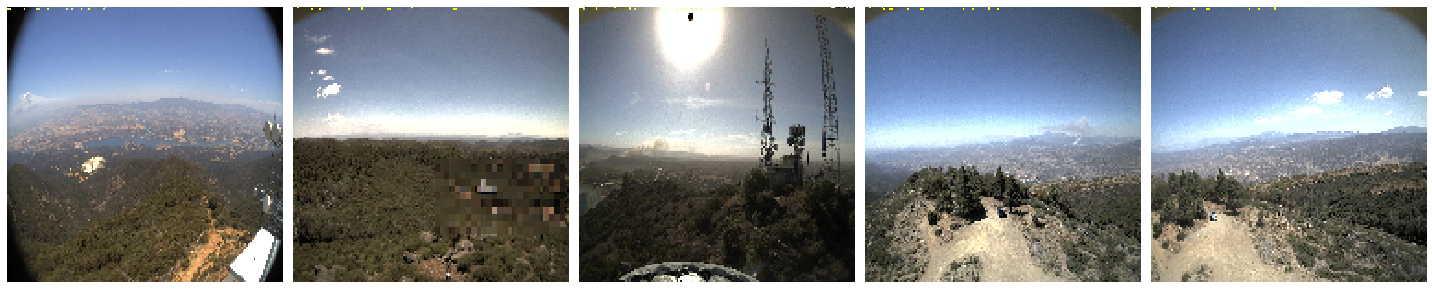

In [19]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [23]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    verbose=1,
    callbacks=[cp_callback]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 53 steps, validate for 13 steps
Epoch 1/15
52/53 [============================>.] - ETA: 1s - loss: 0.7582 - accuracy: 0.5435
Epoch 00001: saving model to training_2/cp.ckpt
53/53 [==============================] - 76s 1s/step - loss: 0.7566 - accuracy: 0.5465 - val_loss: 0.6750 - val_accuracy: 0.5577
Epoch 2/15
52/53 [============================>.] - ETA: 1s - loss: 0.6558 - accuracy: 0.5967
Epoch 00002: saving model to training_2/cp.ckpt
53/53 [==============================] - 75s 1s/step - loss: 0.6599 - accuracy: 0.5977 - val_loss: 0.6058 - val_accuracy: 0.6192
Epoch 3/15
52/53 [============================>.] - ETA: 1s - loss: 0.5816 - accuracy: 0.7205
Epoch 00003: saving model to training_2/cp.ckpt
53/53 [==============================] - 75s 1s/step - loss: 0.5789 - accuracy: 0.7230 - val_loss: 0.4628 - val_accuracy: 0.8000
Epoch 4/15
52/53 [============================>.] - ETA: 1s - loss: 0.4246 - accuracy: 0.8162
E

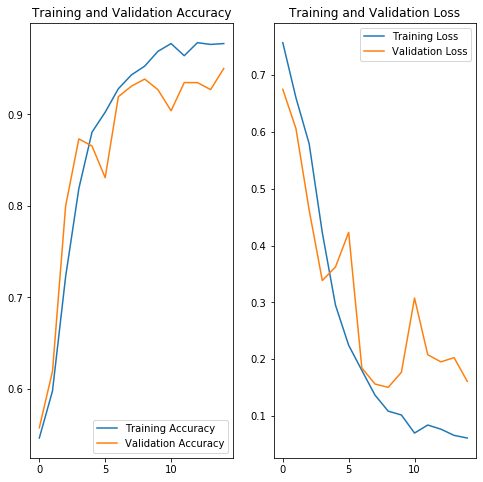

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.save('test_2.h5') 